In [1]:
# Thompson Sampling

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [1] used 21.8164 MiB RAM in 0.16s, peaked 0.00 MiB above current, total RAM usage 106.39 MiB


In [2]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [2] used 0.7695 MiB RAM in 0.92s, peaked 0.00 MiB above current, total RAM usage 107.16 MiB


In [4]:
total_reward

2587

In [4] used 0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 117.10 MiB


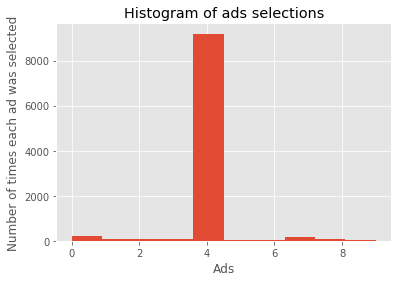

In [3] used 9.9219 MiB RAM in 0.48s, peaked 0.00 MiB above current, total RAM usage 117.08 MiB


In [3]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()